In [20]:
import pickle
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import os
from joblib import load
from tabulate import tabulate
import sys
sys.path.append('..')
from utils import get_meta_data

In [21]:
def process_ax(ax):
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(width = 2.5, color = '0.2')

    ax.set_xlabel(ax.get_xlabel(), fontsize = 15, weight = 'bold', color = '0.2')
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15, weight = 'bold', color = '0.2')

    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)

    return ax

def get_auc(result):
    cutoffs = np.linspace(0.05, 0.5, 10)
    temp = np.array(result).mean(axis=0)
    auc_ = 0
    for k in range(1, len(cutoffs) - 1):
        x = cutoffs[k] - cutoffs[k - 1]
        y = temp[k] + temp[k-1]
        auc = y / ( 2 * x)
    
    return auc

In [22]:
BASE_PATH = '/home/amir/code/tree_exp/'

In [23]:
dataset_names = np.array(['ionosphere', 'wdbc', 'breast-w', 'diabetes', 'qsar-biodeg',
           'banknote-authentication', 'spambase', 'kdd_ipums_la_97-small',
           'phoneme', 'eye_movements', 'pol', 'MagicTelescope', 'house_16H',
           'electricity', 'MiniBooNE', 'covertype', 'Higgs', 'steel-plates-fault', 
                     'blood-transfusion-service-center', 'mozilla4'])
dataset_names_alt = np.array(['Ionosphere', 'WDBC', 'Wisconsin', 'Diabetes', 'Qsar-Biodeg',
           'Banknote Auth', 'Spambase', 'KDD IPUMS (Small)',
           'Phoneme', 'Eye Movements', 'Pol', 'Magic Telescope', 'House 16H',
           'Electricity', 'MiniBooNE', 'Covertype', 'Higgs', 'Steel Plates Fault', 
                     'Blood Transfusion', 'Mozilla4'])

exp_names = ['lime', 'kernel_shap', 'lpi', 'tree_shap_obs', 'tree_shap_inter', 'local_mdi', 'saabas', 'global', 'random']
exp_names_alt = ['LIME', 'SHAP', 'LPI', 'TSHAP (O)', 'TSHAP (I)', 'LocalMDI', 'Saabas',  'Global', 'Random']

In [24]:
m_name = 'gb'
robust_vals = pickle.load( open( "./robust_vals_{}_all_v2.p".format(m_name), "rb" ) )
result = []
measure_name = 'insertion'
for i in range(len(dataset_names)):
    for j in range(len(exp_names)): 
        result.append(get_auc(robust_vals['abs'][measure_name][dataset_names[i]][exp_names[j]]))
result = np.array(result)

result_df = pd.DataFrame(result.reshape(len(dataset_names), len(exp_names)), index=dataset_names, columns=exp_names).round(2)
result_df.index = dataset_names_alt
result_df = result_df.sort_index()

In [25]:
colors = {
    'lime': 'red', 
    'kernel_shap': 'blue', 
    'lpi':'green', 
    'tree_shap_obs': 'magenta', 
    'tree_shap_inter': 'darkgoldenrod', 
    'local_mdi': 'brown', 
    'saabas': 'orange', 
    'global': 'gray',
    'random': 'black'
}

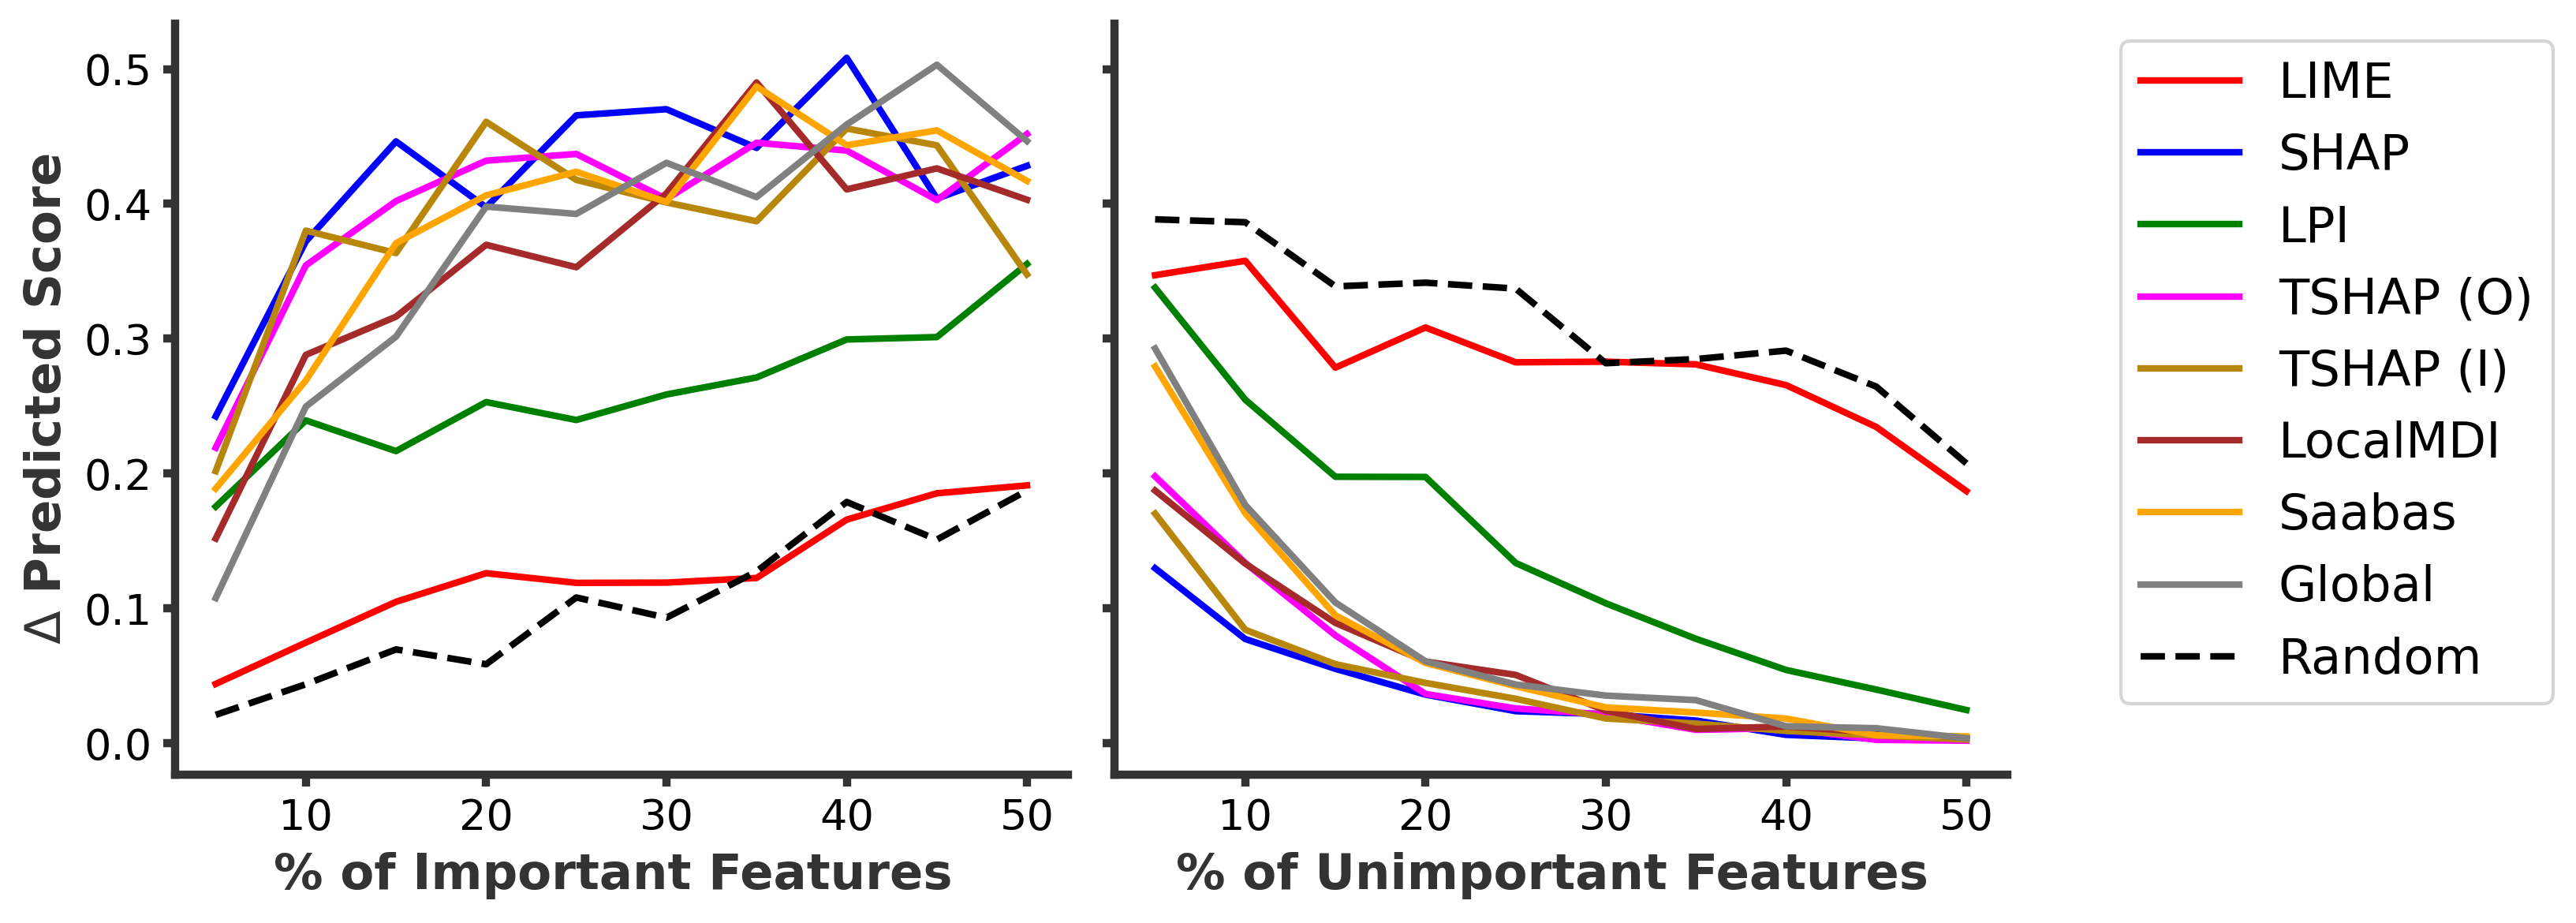

In [26]:
m_name = 'rf'
d_name = 'spambase'
fig, ax = plt.subplots(1, 2, figsize=(11, 4), sharex=True, sharey=True, dpi=300)
cutoffs = np.linspace(0.05, 0.5, 10)

for i in range(len(exp_names)): 
    if exp_names[i] == 'random':
        linestyle = '--'
    else:
        linestyle = '-'
        
    y_value_del = np.array(robust_vals['abs']['deletion'][d_name][exp_names[i]]).mean(axis=0)
    ax[0].plot(cutoffs * 100, y_value_del, label = exp_names_alt[i], linestyle=linestyle, c=colors[exp_names[i]], lw=2)

    y_value_ins = np.array(robust_vals['abs']['insertion'][d_name][exp_names[i]]).mean(axis=0)
    ax[1].plot(cutoffs * 100, y_value_ins, label = exp_names_alt[i], linestyle=linestyle, c=colors[exp_names[i]], lw=2)

    
ax[1].legend(bbox_to_anchor=(1.1, 1.01), fontsize=15)
ax[0].set_xlabel('% of Important Features ') 
ax[0] = process_ax(ax[0])
ax[1] = process_ax(ax[1])
ax[1].set_xlabel('% of Unimportant Features ') 
ax[0].set_ylabel(r'$\Delta$ Predicted Score')

plt.tight_layout()
plt.savefig('../figs/importance_by_preturb_{}_{}.pdf'.format(m_name, d_name))
plt.show()

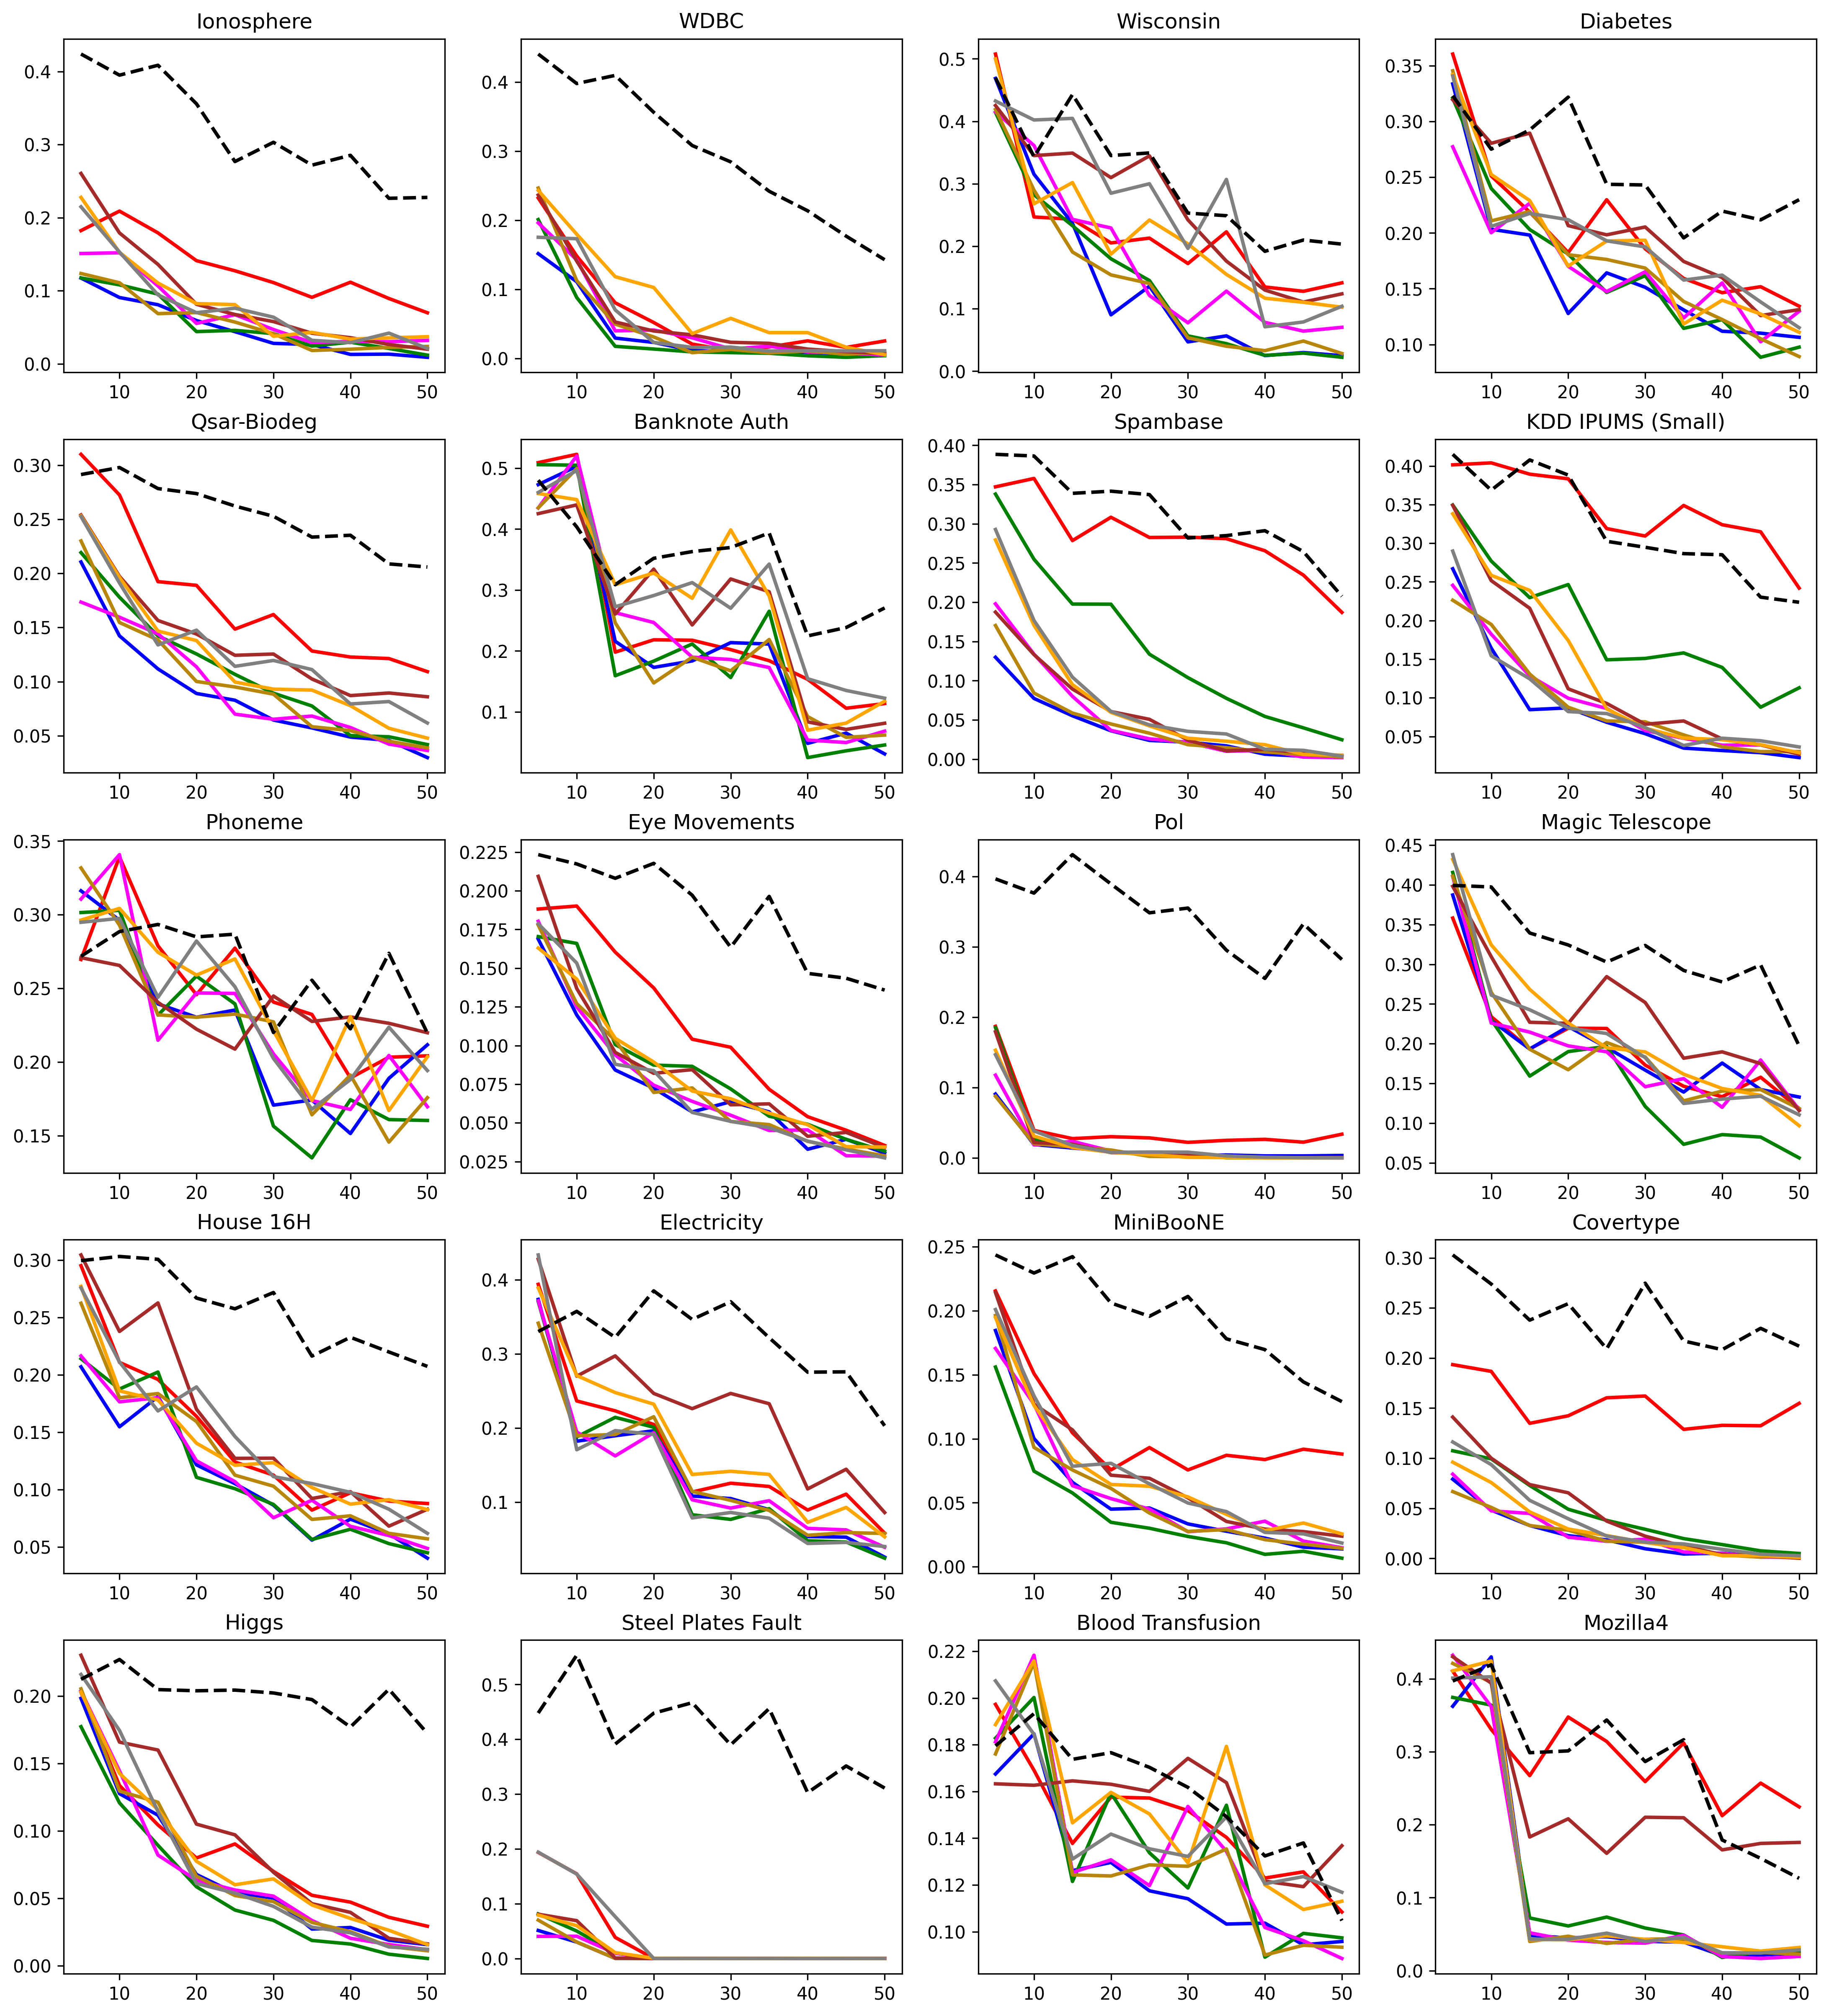

In [27]:
fig, ax = plt.subplots(5, 4, figsize=(18, 20), dpi=300)
cutoffs = np.linspace(0.05, 0.5, 10)
ax = ax.ravel()
measure_name = 'insertion'

for j in range(len(dataset_names)):
    d_name = dataset_names[j]
    for i in range(len(exp_names)): 
        if exp_names[i] == 'random':
            linestyle = '--'
        else:
            linestyle = '-'
            
        y_value_del = np.array(robust_vals['abs'][measure_name][d_name][exp_names[i]]).mean(axis=0)
        ax[j].plot(cutoffs * 100, y_value_del, label = exp_names_alt[i], linestyle=linestyle, c=colors[exp_names[i]], lw=2)
        ax[j].set_title(dataset_names_alt[j])
        '''y_value_ins = np.array(robust_vals['abs']['insertion'][d_name][exp_names[i]]).mean(axis=0)
        ax[j].plot(cutoffs * 100, y_value_ins, label = exp_names_alt[i], linestyle=linestyle, c=colors[exp_names[i]], lw=2)'''

    
#ax[1].legend(bbox_to_anchor=(1.1, 1.01), fontsize=15)
#ax[0].set_xlabel('% of Important Features ') 
#ax[0] = process_ax(ax[0])
#ax[1] = process_ax(ax[1])
#ax[1].set_xlabel('% of Unimportant Features ') 
#ax[0].set_ylabel(r'$\Delta$ Predicted Score')

#plt.tight_layout()
#plt.savefig('../figs/importance_by_preturb_{}_{}.pdf'.format(m_name, d_name))
plt.show()

<BarContainer object of 4 artists>

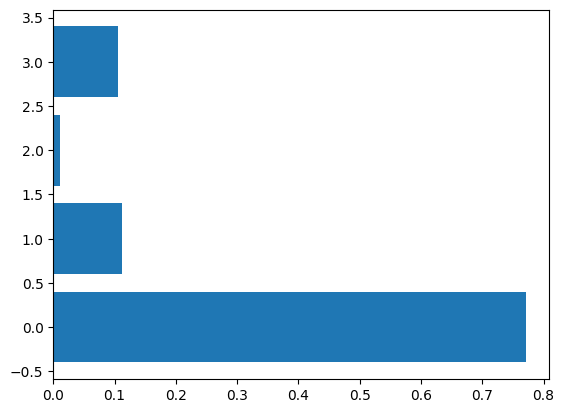

In [28]:
m_path = f'{BASE_PATH}/models/default'
model = load(f'{m_path}/{d_name}/{m_name}.joblib')
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)